<a href="https://colab.research.google.com/github/AngelTroncoso/s-20-10-data/blob/Melisa/An%C3%A1lisis_METS_OPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cargar dataset
df = pd.read_csv('/content/drive/MyDrive/base-de-datos-mets-opt_cleaned.csv', encoding='latin-1')


In [ ]:
# Vista previa de las dimensiones de dataaset e identificar inconsistencias
print('Forma:', df.shape)
print('\
Columas:', df.columns.tolist())
print('\
Valores nulos:')
print(df.isnull().sum())
print('\
duplicados:', df.duplicates().sum() if hasattr(df, 'duplicates') else len(df[df.duplicated()]))
print('\
Muestra de los datos:')
print(df.head())

Forma: (466, 15)
Columas: ['EXPEDIENTE', 'EDAD', 'SEXO', 'TUMOR PRIMARIO', 'SUBTIPO HISTOLOGICO', 'PERFIL MOLECULAR', 'TAMAÑO (mm)', 'LOCALIZACION', 'CIRUGIA PREVIA', 'SRS', 'DOSIS (Gy)', 'TECNICA ', 'TRATAMIENTO SISTEMICO', 'RESPUESTA (CRITERIOS RANO)', 'RESPUESTA_BINARIA']
Valores nulos:
EXPEDIENTE                    0
EDAD                          0
SEXO                          0
TUMOR PRIMARIO                0
SUBTIPO HISTOLOGICO           0
PERFIL MOLECULAR              0
TAMAÑO (mm)                   0
LOCALIZACION                  0
CIRUGIA PREVIA                0
SRS                           0
DOSIS (Gy)                    0
TECNICA                       0
TRATAMIENTO SISTEMICO         0
RESPUESTA (CRITERIOS RANO)    0
RESPUESTA_BINARIA             0
dtype: int64
duplicados: 0
Muestra de los datos:
  EXPEDIENTE  EDAD SEXO  TUMOR PRIMARIO           SUBTIPO HISTOLOGICO  \
0   0_209406  55.0    F  CANCER DE MAMA  CARCINOMA DUCTAL INFILTRANTE   
1   0_225523  56.0    M    CANCER 

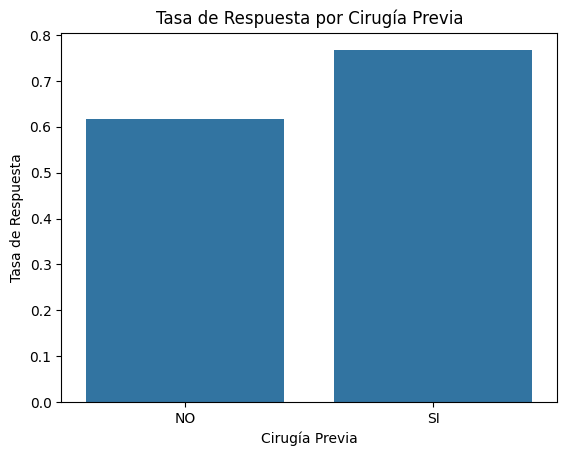

Resultado del test Chi-squared:
Chi2: 2.0865282629044914
p-value: 0.14860343799621115
Grados de libertad: 1
Frecuencias esperadas:
[[162.79828326 273.20171674]
 [ 11.20171674  18.79828326]]


In [ ]:
# Agrupar datos por 'CIRUGIA PREVIA' y calcular la media de 'RESPUESTA_BINARIA'
grouped_data = df.groupby('CIRUGIA PREVIA')['RESPUESTA_BINARIA'].mean()

# Realizar prueba de chi-cuadrado para evaluar la independencia
contingency_table = pd.crosstab(df['CIRUGIA PREVIA'], df['RESPUESTA_BINARIA'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Visualizar resultados
sns.barplot(x=grouped_data.index, y=grouped_data.values)
plt.title('Tasa de Respuesta por Cirugía Previa')
plt.xlabel('Cirugía Previa')
plt.ylabel('Tasa de Respuesta')
plt.show()

#Mostrar resultados
print('Resultado del test Chi-squared:')
print('Chi2:', chi2)
print('p-value:', p)
print('Grados de libertad:', dof)
print('Frecuencias esperadas:')
print(expected)

Se concluye a partir de los resultados de la prueba de chi-cuadrado (valor p = 0.1486> 0,05), no hay diferencia estadísticamente significativa en las tasas de respuesta entre pacientes con y sin cirugía previa. La visualización muestra proporciones de respuesta similares entre ambos grupos.

Para una siguiente prueba A/B entre “TRATAMIENTO SISTEMICO” y “RESPUESTA_BINARIA”, se analizará la relación entre estas variables mediante una prueba de chi-cuadrado. Visualizar los resultados.


Resultados del Test Chi-cuadrado:
Estadístico Chi2: 123.1201
Valor p: 0.0000

Tabla de contingencia:
RESPUESTA_BINARIA                                    0   1
TRATAMIENTO SISTEMICO                                     
5 CICLOS NO ESPECIFICA                               2   1
AFATINIB                                             4   4
ALEKTINIB                                            0   1
ALETINIB                                             3  11
BEVACIZUMAB                                          1   1
BEVACIZUMAB + PEMETREXED                             7  13
CABOZATINIB                                          0   1
CAPECITABINE                                        24  11
CAPECITABINE + FULVESTRANT                           1   2
CAPECITABINE + TRASTUZUMAB                           3  13
CAPECITABINE + TRASTUZUMAB + EXEMESTANO              0   5
CARBOPLATINO                                         1   4
CARBOPLATINO + PACLITAXEL                            3   9
CARBOPLATINO 

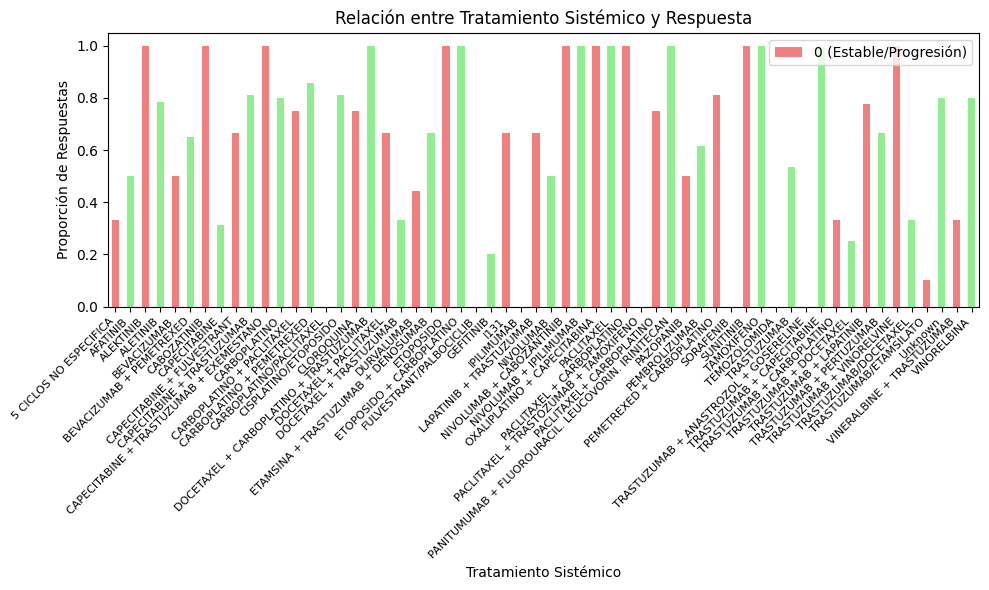

In [ ]:
# Agrupar data por 'TRATAMIENTO SISTEMICO' y calcular la media de 'RESPUESTA_BINARIA'
grouped_data = df.groupby('TRATAMIENTO SISTEMICO')['RESPUESTA_BINARIA'].mean()

# Realizar prueba chi-cuadrado
contingency_table = pd.crosstab(df['TRATAMIENTO SISTEMICO'], df['RESPUESTA_BINARIA'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)


print('\nResultados del Test Chi-cuadrado:')
print(f'Estadístico Chi2: {chi2:.4f}')
print(f'Valor p: {p_value:.4f}')
print('\nTabla de contingencia:')
print(contingency_table)

# Crear gráfico de barras apiladas
colors = ['lightcoral', 'lightgreen']  # Define los colores para las respuestas 0 y 1
grouped_data.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))

# Personalizar el gráfico
plt.title('Relación entre Tratamiento Sistémico y Respuesta')
plt.xlabel('Tratamiento Sistémico')
plt.ylabel('Proporción de Respuestas')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.legend(labels=['0 (Estable/Progresión)', '1 (Respuesta parcial/completa)'])
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Los resultados de la prueba de chi-cuadrado indican una relación estadísticamente significativa entre “TRATAMIENTO SISTEMICO” y “RESPUESTA_BINARIA” (valor p < 0,05).

Relación entre las columnas "TUMOR PRIMARIO" y "LOCALIZACIÓN"

In [ ]:
print("Valores únicos en LOCALIZACION:")
print(df['LOCALIZACION'].unique())

Valores únicos en LOCALIZACION:
['PARIETAL' 'FRONTAL' 'CEREBELO' 'ORBITA IZQ' 'TENTORIAL' 'MESENCEFALO'
 'TEMPORAL' 'PARIETOOCIPITAL' 'OCCIPITAL' 'ÓRBITA IZQ' 'PUENTE'
 'FRONTOPARIETAL DER' 'TÁLAMO' 'TALAMO IZQ' 'VERMIS CEREBELOSO'
 'PEDUNCULO SUP DER' 'ASTA POST VLI' 'INSULAR' 'NUCLEOS DE LA BASE'
 'HOLOCRANEO' 'ANGULO PONTOCEREBELOSO' 'CAUDADO']



Resultados del Test Chi-cuadrado:
Estadístico Chi2: 538.1213
Valor p: 0.0000

Tabla de contingencia:
LOCALIZACION            ANGULO PONTOCEREBELOSO  ASTA POST VLI  CAUDADO  \
TUMOR PRIMARIO                                                           
CANCER CERVICOUTERINO                        0              0        0   
CANCER DE COLON                              0              0        0   
CANCER DE ENDOMETRIO                         0              0        0   
CANCER DE ESOFAGO                            0              0        0   
CANCER DE MAMA                               0              0        0   
CANCER DE OVARIO                             0              0        0   
CANCER DE PROSTATA                           0              0        0   
CANCER DE PULMON                             0              0        2   
CANCER DE TIROIDES                           0              0        0   
CANCER RENAL                                 0              1        0   
CANCER TES

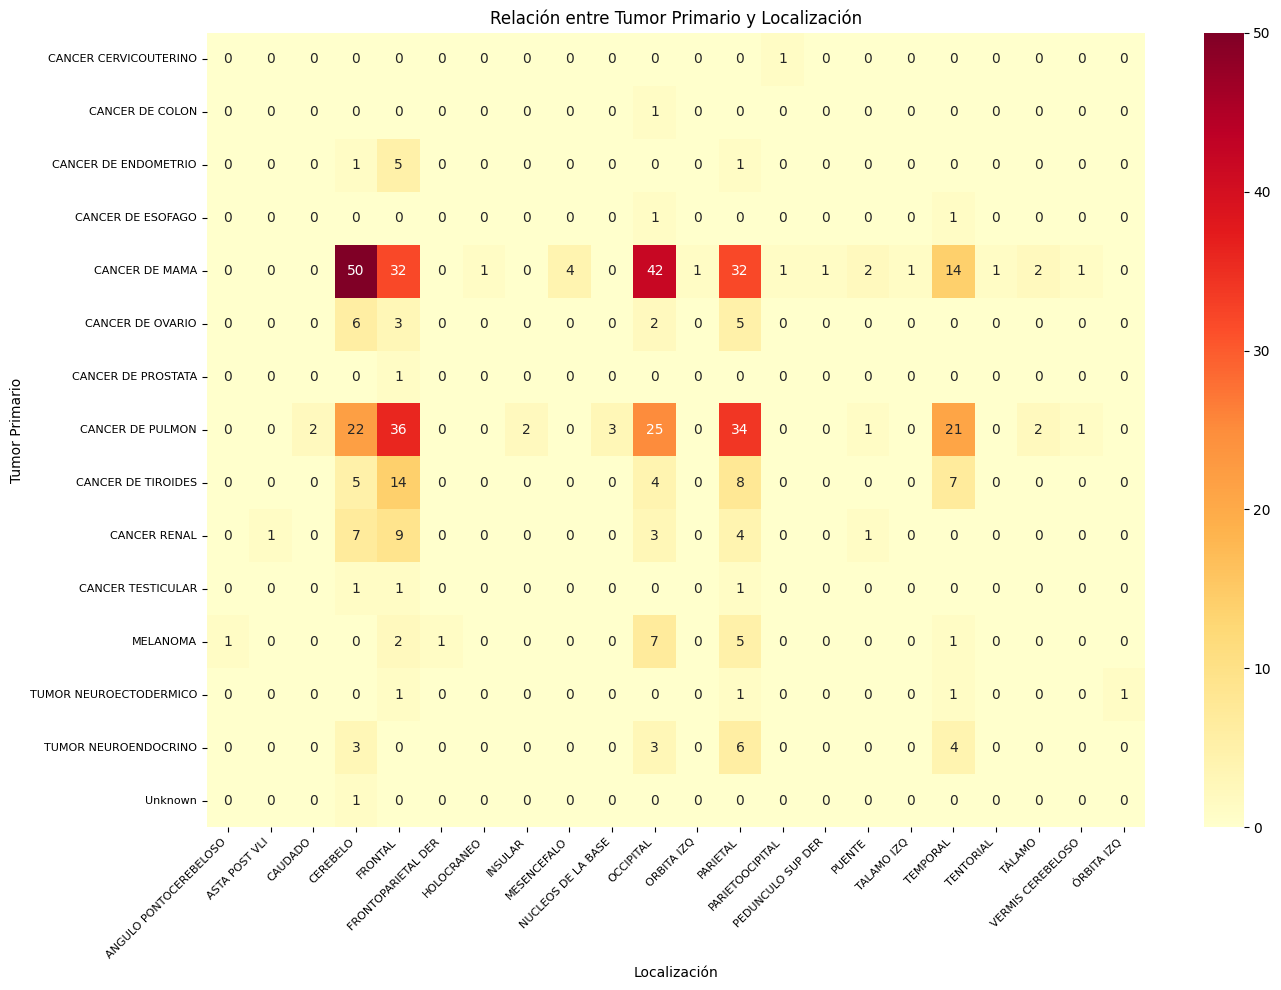

In [ ]:
# Crear tabla de contingencia
contingency_table = pd.crosstab(df['TUMOR PRIMARIO'], df['LOCALIZACION'])

# Realizar prueba chi-cuadrado
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print('\nResultados del Test Chi-cuadrado:')
print(f'Estadístico Chi2: {chi2:.4f}')
print(f'Valor p: {p_value:.4f}')
print('\nTabla de contingencia:')
print(contingency_table)

# Crear un heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(contingency_table, annot=True, cmap='YlOrRd', fmt='d')
plt.title('Relación entre Tumor Primario y Localización')
plt.xlabel('Localización')
plt.ylabel('Tumor Primario')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()

El estadístico Chi2 (538.1213) es alto, lo que indica una gran discrepancia entre las frecuencias observadas y las frecuencias esperadas si las variables fueran independientes.

Dado que el valor p es menor que 0.05 (valor p 0.0000), indica una relación estadísticamente significativa entre el tipo de tumor primario y la localización de la metástasis. Es decir, el tipo de tumor primario influye en la localización de la metástasis.

Encontramos principalmente una relación de tumor primario en mama con la localización en lóbulo occipital, lóbulo parietal, lóbulo frontal y cerebelo.
Además, otra relación importante es entre tumor primario en pulmón y localización en lóbulo frontal (con ayor incidencia en lóbulo frontal derecho respecto al izquierdo), lóbulo parietal, lóbulo occipital, lóbulo temporal y cerebelo.

Relación entre columnas "SRS" y "RESPUESTA_BINARIA"

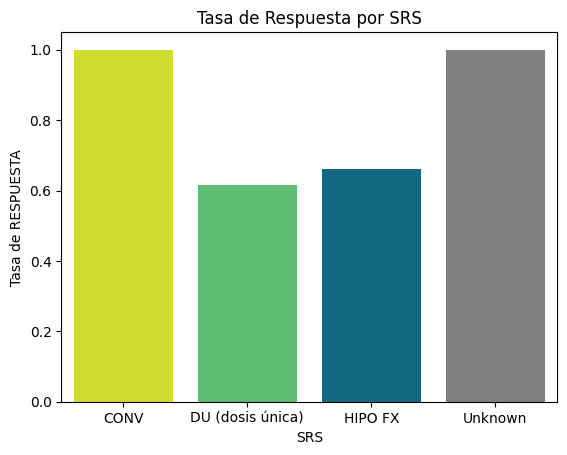

Resultado del test Chi-squared:
Chi2: 1.8314701775138365
p-value: 0.608110734577963
Grados de libertad: 3
Frecuencias esperadas:
[[  0.37339056   0.62660944]
 [137.03433476 229.96566524]
 [ 36.21888412  60.78111588]
 [  0.37339056   0.62660944]]


In [ ]:
# Agrupar datos por 'SRS' y calcular la media de 'RESPUESTA_BINARIA'
grouped_data = df.groupby('SRS')['RESPUESTA_BINARIA'].mean()

# Realizar prueba de chi-cuadrado para evaluar la independencia
contingency_table = pd.crosstab(df['SRS'], df['RESPUESTA_BINARIA'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Lista de colores personalizada (uno para cada barra)
colors1 = ['#eaf816', '#50cd6d', '#007491', '#808080']

# Visualizar gráfico
sns.barplot(x=grouped_data.index, y=grouped_data.values, palette=colors1)

plt.title('Tasa de Respuesta por SRS')
plt.xlabel('SRS')
plt.ylabel('Tasa de RESPUESTA')
plt.show()

# Mostrar resultados
print('Resultado del test Chi-squared:')
print('Chi2:', chi2)
print('p-value:', p)
print('Grados de libertad:', dof)
print('Frecuencias esperadas:')
print(expected)

Dado que el valor p de la prueba de chi-cuadrado para 'SRS' y 'RESPUESTA_BINARIA' es mayor que 0.05 (valor p 0.6081), indica que no hay una relación estadísticamente significativa entre estas dos variables.

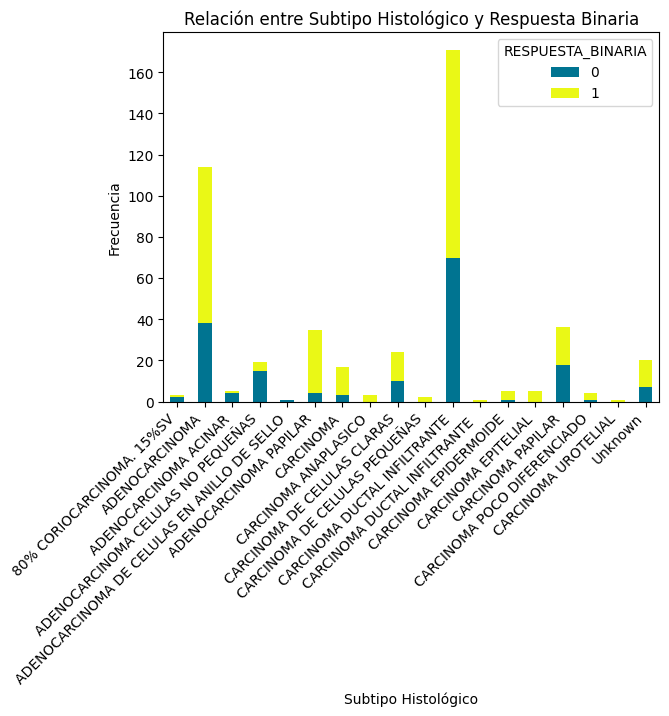

Resultado del test Chi-squared:
Chi2: 46.075727504812704
p-value: 0.00016810289717832057
Grados de libertad: 17
Frecuencias esperadas:
[[  1.12017167   1.87982833]
 [ 42.56652361  71.43347639]
 [  1.86695279   3.13304721]
 [  7.0944206   11.9055794 ]
 [  0.37339056   0.62660944]
 [ 13.06866953  21.93133047]
 [  6.34763948  10.65236052]
 [  1.12017167   1.87982833]
 [  8.96137339  15.03862661]
 [  0.74678112   1.25321888]
 [ 63.84978541 107.15021459]
 [  0.37339056   0.62660944]
 [  1.86695279   3.13304721]
 [  1.86695279   3.13304721]
 [ 13.44206009  22.55793991]
 [  1.49356223   2.50643777]
 [  0.37339056   0.62660944]
 [  7.46781116  12.53218884]]


In [ ]:
# Agrupa los datos por 'SUBTIPO HISTOLOGICO' y calcula la media de 'RESPUESTA_BINARIA'
grouped_data = df.groupby('SUBTIPO HISTOLOGICO')['RESPUESTA_BINARIA'].mean()

# Realiza la prueba de chi-cuadrado para evaluar la independencia
contingency_table = pd.crosstab(df['SUBTIPO HISTOLOGICO'], df['RESPUESTA_BINARIA'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Visualiza los resultados
# Crear tabla de contingencia
contingency_table = pd.crosstab(df['SUBTIPO HISTOLOGICO'], df['RESPUESTA_BINARIA'])

# Graficar barras apiladas
contingency_table.plot(kind='bar', stacked=True, color=['#007491', '#eaf816'])
plt.title('Relación entre Subtipo Histológico y Respuesta Binaria')
plt.xlabel('Subtipo Histológico')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

# Muestra los resultados de la prueba de chi-cuadrado
print('Resultado del test Chi-squared:')
print('Chi2:', chi2)
print('p-value:', p)
print('Grados de libertad:', dof)
print('Frecuencias esperadas:')
print(expected)

Los resultados de la prueba de chi-cuadrado indican una relación estadísticamente significativa entre el subtipo histológico y la respuesta binaria (χ² = 46.07, p < 0.05). Esto significa que el subtipo histológico del tumor tiene un impacto en la probabilidad de obtener una respuesta favorable (RESPUESTA_BINARIA = 1) al tratamiento.
En otras palabras, diferentes subtipos histológicos tienen diferentes tasas de respuesta al tratamiento.
